In [47]:
import pandas as pd
from scipy.stats import kruskal
import scikit_posthocs as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
def asterisk(p):
    if p < 0.001:
        return f"{p}****"
    elif p < 0.005:
        return f"{p}***"
    elif p < 0.01:
        return f"{p}**"
    elif p < 0.05:
        return f"{p}*"
    else:
        return str(p)

In [49]:
df=pd.read_csv('../../data/described/described_antiviral_homology_90.csv')

In [50]:
df

,sequence,experimental_characteristics,half_life_seconds,length_sequence,target,Molecular Weight,Isoelectric point,Charge density,Charge,Instability index,...,freq_L,freq_M,freq_P,freq_Q,freq_R,freq_S,freq_T,freq_V,freq_W,freq_Y
0,AAAMSQVTN,Mammalian,15840.0,9,1,891.01,12.2500,0.00112,0.996,44.6000,...,0.0000,0.1111,0.0000,0.1111,0.0000,0.1111,0.1111,0.1111,0.0000,0.0000
1,AACEVAKNLNESLIDLQELGKYEQYIKW,Mammalian,15840.0,28,1,3268.71,4.6846,-0.00033,-1.068,46.1643,...,0.1429,0.0000,0.0000,0.0714,0.0000,0.0357,0.0000,0.0357,0.0357,0.0714
2,AAGAVVNDL,Mammalian,15840.0,9,1,827.93,6.5000,-0.00000,-0.004,-0.5444,...,0.1111,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2222,0.0000,0.0000
3,AAHLIDALYAEFLGGRVLTTPVVHRALFYASAVLRQPFLAGVPSA,Mammalian,15840.0,45,1,4779.56,10.1865,0.00046,2.194,58.3624,...,0.1556,0.0000,0.0667,0.0222,0.0667,0.0444,0.0444,0.1111,0.0000,0.0444
4,AAKAWKKAKAWKKAKWWKKAA,Mammalian,15840.0,21,1,2484.06,13.3125,0.00402,9.994,9.5238,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1905,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,YVREHGVPIHADKYFEQVLK,Mammalian,10080.0,20,1,2427.77,9.4360,0.00049,1.195,9.4700,...,0.0500,0.0000,0.0500,0.0500,0.0500,0.0000,0.0000,0.1500,0.0000,0.1000
1309,YWILEYLWKVPFDFWRGV,E_coli,7200.0,18,0,2416.82,9.4746,0.00041,0.996,42.1722,...,0.1111,0.0000,0.0556,0.0000,0.0556,0.0000,0.0000,0.1111,0.1667,0.1111
1310,YWILEYLWKVPFDFWRGV,Mammalian,10080.0,18,1,2416.82,9.4746,0.00041,0.996,42.1722,...,0.1111,0.0000,0.0556,0.0000,0.0556,0.0000,0.0000,0.1111,0.1667,0.1111
1311,YWILEYLWKVPFDFWRGV,Yeast,36000.0,18,2,2416.82,9.4746,0.00041,0.996,42.1722,...,0.1111,0.0000,0.0556,0.0000,0.0556,0.0000,0.0000,0.1111,0.1667,0.1111


In [51]:
df_high = df[df['target'] == 2]
df_mid = df[df['target'] == 1]
df_low = df[df['target'] == 0]

In [52]:
num_columns = [
    'Molecular Weight', 'Isoelectric point', 'Charge density', 'Charge',
    'Instability index', 'Aromaticity', 'Aliphatic index', 'Boman index', 'Hydrophobic ratio',
    'freq_A', 'freq_C', 'freq_D', 'freq_E', 'freq_F', 'freq_G', 'freq_H', 'freq_I',
    'freq_N', 'freq_K', 'freq_L', 'freq_M', 'freq_P', 'freq_Q', 'freq_R',
    'freq_S', 'freq_T', 'freq_V', 'freq_W', 'freq_Y'
]

In [53]:
n_iterations = 1000
n_samples = min(len(df_high), len(df_mid), len(df_low)) 
i=0
results_list = []
post_hoc_results_list = []

In [ ]:
for i in range(n_iterations):
                                                                                                                                                            high_sample = df_high.sample(n=n_samples, replace=False, random_state=i)
                                                                                                                                                            mid_sample = df_mid.sample(n=n_samples, replace=False, random_state=i)
                                                                                                                                                            low_sample = df_low.sample(n=n_samples, replace=False, random_state=i)
                                                                                                                                                            
    for column in num_columns:
        stat, p_value = kruskal(high_sample[column], mid_sample[column], low_sample[column])
        
        results_list.append({
            'Iteration': i, 'Column': column, 'P_value': p_value
        })
        
        if p_value < 0.05:
            combined_samples = [high_sample[column], mid_sample[column], low_sample[column]]
            pvals_dunn = sp.posthoc_dunn(combined_samples, p_adjust='bonferroni')
            
            dunn_results = pvals_dunn.to_dict()  #Convertir el DataFrame de Dunn en un diccionario
            dunn_results = {
                'High_vs_Mid': pvals_dunn.iloc[2, 1],
                'High_vs_Low': pvals_dunn.iloc[2, 0],
                'Mid_vs_Low': pvals_dunn.iloc[1, 0]
            }

            post_hoc_results_list.append({
                'Iteration': i, 'Column': column, 'PostHoc_Pvalues': dunn_results
            })

results = pd.DataFrame(results_list)
dunn = pd.DataFrame(post_hoc_results_list)

In [55]:
results["P_value"] = pd.to_numeric(results["P_value"], errors="coerce")

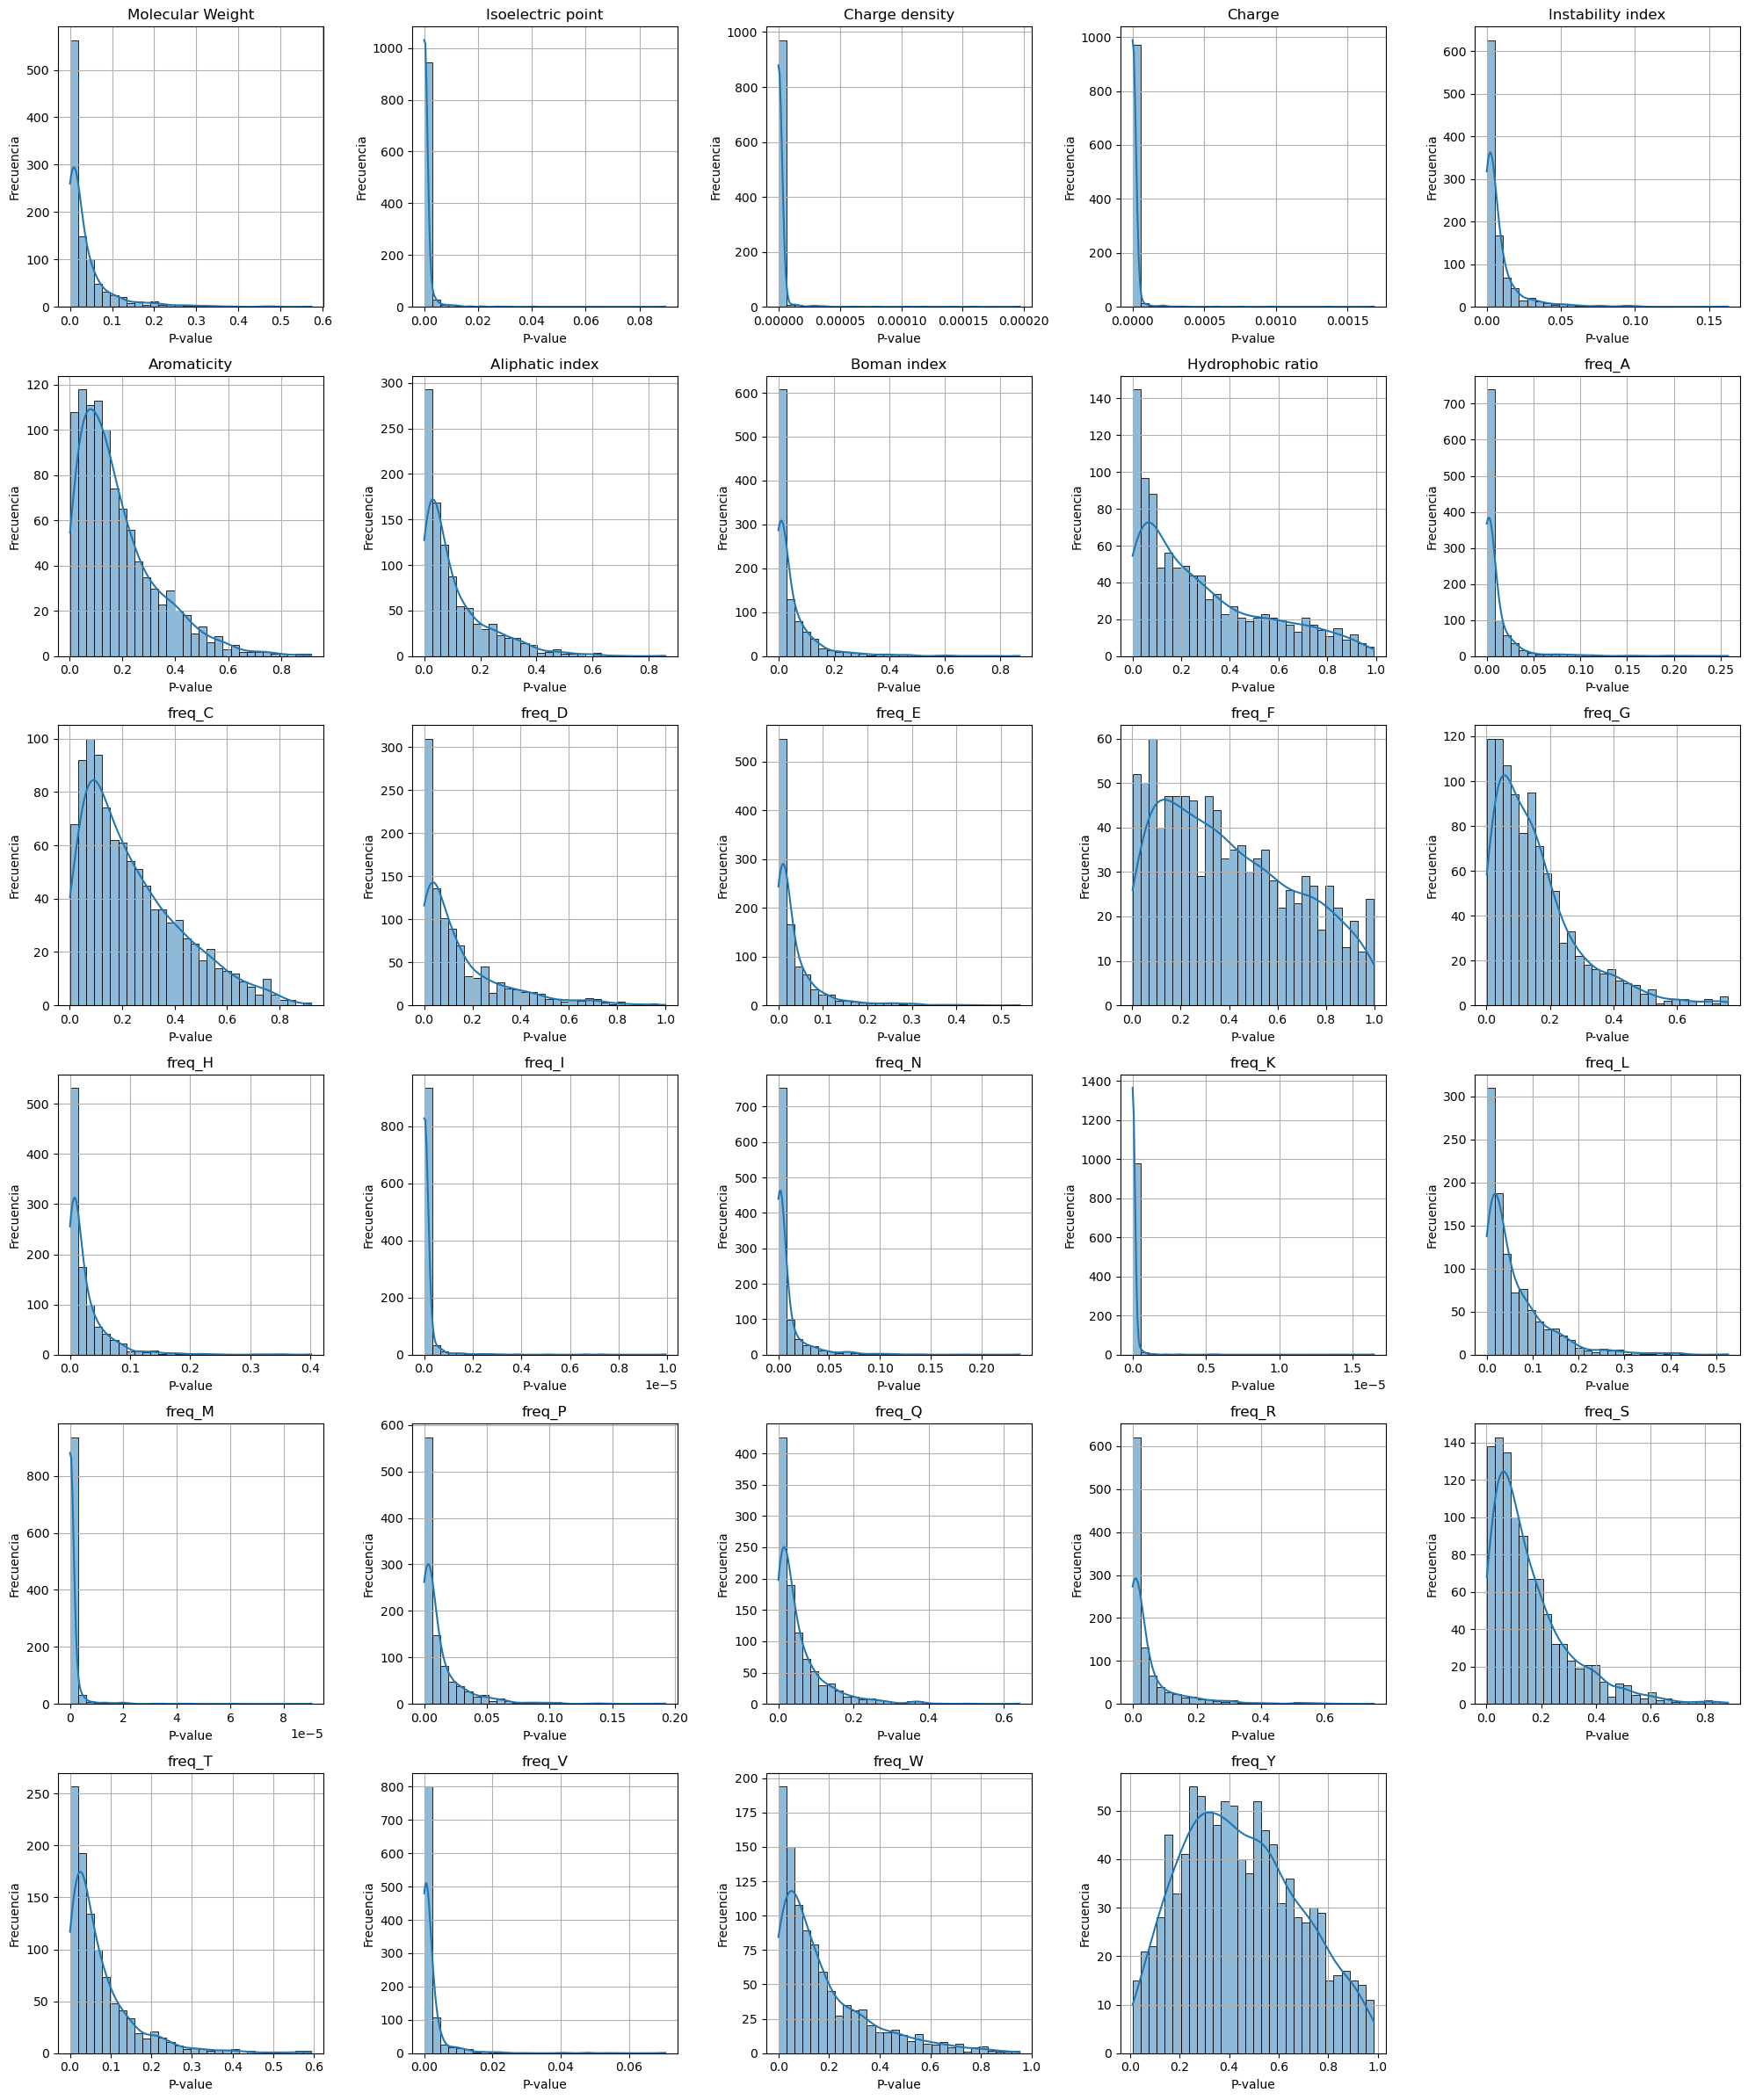

In [56]:
results_grouped = results.groupby("Column")
columns = results['Column'].unique()
# Creamos la figura con subplots
fig, axes = plt.subplots(6, 5, figsize=(20, 24))  # Ajusta las filas/columnas
axes = axes.flatten()  # Aplana el array de ejes

for i, col in enumerate(columns):
    subset = results[results['Column'] == col]
    sns.histplot(subset['P_value'], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('P-value')
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid(True)

# Si sobran ejes vacíos, los escondemos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig(f"../../img/antiviral/stat/kruskal.png", dpi=300)
plt.show()

In [57]:
#results.drop(columns=['Iteration'], inplace=True)
mean = results.groupby("Column", as_index=False)["P_value"].mean()
mean

,Column,P_value
0,Aliphatic index,1.092208e-01
1,Aromaticity,1.806417e-01
2,Boman index,5.268196e-02
3,Charge,1.128034e-05
4,Charge density,1.521008e-06
5,Hydrophobic ratio,2.884274e-01
6,Instability index,8.485332e-03
7,Isoelectric point,8.545035e-04
8,Molecular Weight,3.795694e-02
9,freq_A,1.077070e-02


In [58]:
mean['Column'] = mean.apply(lambda row: f"{row['Column']} {asterisk(row['P_value'])}", axis=1)
mean['Column'] = mean['Column'].str.replace(r'\d+(\.\d+)?(e[+-]?\d+)?', '', regex=True).str.strip()

In [59]:
mean.dtypes

Column      object
P_value    float64
dtype: object

In [60]:
mean.round(5)

,Column,P_value
0,Aliphatic index,0.10922
1,Aromaticity,0.18064
2,Boman index,0.05268
3,Charge ****,0.00001
4,Charge density ****,0.00000
5,Hydrophobic ratio,0.28843
6,Instability index **,0.00849
7,Isoelectric point ****,0.00085
8,Molecular Weight *,0.03796
9,freq_A *,0.01077


In [61]:
mean.to_csv("../../rest/kruskal_test_results.csv", index=False)

In [62]:
posthoc_values = []

In [63]:
for _, row in dunn.iterrows():
    for comparison, p_value in row['PostHoc_Pvalues'].items():
        posthoc_values.append({
            'Feature': row['Column'],
            'Comparison': comparison,
            'P_value': p_value
        })
posthoc_df = pd.DataFrame(posthoc_values)

In [64]:
posthoc_df.dtypes

Feature        object
Comparison     object
P_value       float64
dtype: object

In [65]:
posthoc_df

,Feature,Comparison,P_value
0,Molecular Weight,High_vs_Mid,0.007856
1,Molecular Weight,High_vs_Low,1.000000
2,Molecular Weight,Mid_vs_Low,0.006459
3,Isoelectric point,High_vs_Mid,0.451020
4,Isoelectric point,High_vs_Low,0.000228
...,...,...,...
55972,freq_R,High_vs_Low,0.333429
55973,freq_R,Mid_vs_Low,1.000000
55974,freq_V,High_vs_Mid,1.000000
55975,freq_V,High_vs_Low,0.001681


In [66]:
posthoc_df_mean = posthoc_df.groupby(["Feature", "Comparison"], as_index=False)["P_value"].mean()
posthoc_df_mean

,Feature,Comparison,P_value
0,Aliphatic index,High_vs_Low,0.027946
1,Aliphatic index,High_vs_Mid,0.527591
2,Aliphatic index,Mid_vs_Low,0.511155
3,Aromaticity,High_vs_Low,0.218454
4,Aromaticity,High_vs_Mid,0.783690
...,...,...,...
82,freq_W,High_vs_Mid,0.082893
83,freq_W,Mid_vs_Low,0.088468
84,freq_Y,High_vs_Low,0.898942
85,freq_Y,High_vs_Mid,0.149045


In [67]:
posthoc_df_mean['Feature'] = posthoc_df_mean.apply(lambda row: f"{row['Feature']} {asterisk(row['P_value'])}", axis=1)
posthoc_df_mean['Feature'] = posthoc_df_mean['Feature'].str.replace(r'\d+(\.\d+)?(e[+-]?\d+)?', '', regex=True).str.strip()

In [68]:
posthoc_df_mean.sort_values(by='P_value', ascending=True, inplace=True)

In [69]:
posthoc_df_mean["n_asterisks"] = posthoc_df_mean["Feature"].str.extract(r"(\*+)$")[0].str.len().fillna(0).astype(int)
# Ver cuántos hay de cada cantidad
conteo_asteriscos = posthoc_df_mean["n_asterisks"].value_counts().sort_index()
print(conteo_asteriscos)


n_asterisks
0    63
1    12
2     2
3     1
4     9
Name: count, dtype: int64
